This simulation aims to show some unexpected results on the motoneuron spike times when the Renshaw cell is present.

In [1]:
import sys
sys.path.insert(0, '..')
# Allows plots to be zoomed in, etc
%matplotlib notebook

import matplotlib.pyplot as plt
import numpy as np
import time

from Configuration import Configuration
from MotorUnitPool import MotorUnitPool
from InterneuronPool import InterneuronPool
from SynapsesFactory import SynapsesFactory

In [7]:
def simulator(numberS, numberFR, numberFF, numberRC, duration, current, withRC, newParametrization):

    conf = Configuration('confuchiyama.rmto')

    # Number of cells
    idx = np.where(conf.confArray['f0']=='MUnumber_SOL-S')[0][0]
    conf.confArray['f1'][idx] = numberS
    idx = np.where(conf.confArray['f0']=='MUnumber_SOL-FR')[0][0]
    conf.confArray['f1'][idx] = numberFR
    idx = np.where(conf.confArray['f0']=='MUnumber_SOL-FF')[0][0]
    conf.confArray['f1'][idx] = numberFF
    idx = np.where(conf.confArray['f0']=='Number_RC_ext')[0][0]
    conf.confArray['f1'][idx] = numberRC
    
    # Duration of simulation
    conf.simDuration_ms = duration
    
    # Threshold
    #idx = np.where(conf.confArray['f0']=='threshold:RC_ext-')[0][0]
    #conf.confArray['f1'][idx] = 0.17
    #conf.confArray['f2'][idx] = 0.17
    
    if not newParametrization:
        # Parameters from java
        ## Connectivity
        idx = np.where(conf.confArray['f0']=='Con:RC_ext->SOL-S@soma|inhibitory')[0][0]
        conf.confArray['f1'][idx] = 100
        idx = np.where(conf.confArray['f0']=='Con:RC_ext->SOL-FR@soma|inhibitory')[0][0]
        conf.confArray['f1'][idx] = 100
        idx = np.where(conf.confArray['f0']=='Con:RC_ext->SOL-FF@soma|inhibitory')[0][0]
        conf.confArray['f1'][idx] = 100
        idx = np.where(conf.confArray['f0']=='Con:SOL-S>RC_ext-@soma|excitatory')[0][0]
        conf.confArray['f1'][idx] = 100
        idx = np.where(conf.confArray['f0']=='Con:SOL-FR>RC_ext-@soma|excitatory')[0][0]
        conf.confArray['f1'][idx] = 100
        idx = np.where(conf.confArray['f0']=='Con:SOL-FF>RC_ext-@soma|excitatory')[0][0]
        conf.confArray['f1'][idx] = 100

        ## Conductances
        idx = np.where(conf.confArray['f0']=='gmax:RC_ext->SOL-S@soma|inhibitory')[0][0]
        conf.confArray['f1'][idx] = 0.036#0.44
        idx = np.where(conf.confArray['f0']=='gmax:RC_ext->SOL-FR@soma|inhibitory')[0][0]
        conf.confArray['f1'][idx] = 0.036#0.3
        idx = np.where(conf.confArray['f0']=='gmax:RC_ext->SOL-FF@soma|inhibitory')[0][0]
        conf.confArray['f1'][idx] = 0.036#0.24
        idx = np.where(conf.confArray['f0']=='gmax:SOL-S>RC_ext-@soma|excitatory')[0][0]
        conf.confArray['f1'][idx] = 0.007#0.15
        idx = np.where(conf.confArray['f0']=='gmax:SOL-FR>RC_ext-@soma|excitatory')[0][0]
        conf.confArray['f1'][idx] = 0.020#0.17
        idx = np.where(conf.confArray['f0']=='gmax:SOL-FF>RC_ext-@soma|excitatory')[0][0]
        conf.confArray['f1'][idx] = 0.035#0.3

        ## Morphology
        idx = np.where(conf.confArray['f0']=='d@soma:RC_ext-')[0][0]
        conf.confArray['f1'][idx] = 65
        conf.confArray['f2'][idx] = 65
        idx = np.where(conf.confArray['f0']=='l@soma:RC_ext-')[0][0]
        conf.confArray['f1'][idx] = 285
        conf.confArray['f2'][idx] = 285
        idx = np.where(conf.confArray['f0']=='res@soma:RC_ext-')[0][0]
        conf.confArray['f1'][idx] = 200
        conf.confArray['f2'][idx] = 200
    
    else:
        # Parameters from Python
        ## Connectivity
        idx = np.where(conf.confArray['f0']=='Con:RC_ext->SOL-S@soma|inhibitory')[0][0]
        conf.confArray['f1'][idx] = 4
        idx = np.where(conf.confArray['f0']=='Con:RC_ext->SOL-FR@soma|inhibitory')[0][0]
        conf.confArray['f1'][idx] = 4
        idx = np.where(conf.confArray['f0']=='Con:RC_ext->SOL-FF@soma|inhibitory')[0][0]
        conf.confArray['f1'][idx] = 4
        idx = np.where(conf.confArray['f0']=='Con:SOL-S>RC_ext-@soma|excitatory')[0][0]
        conf.confArray['f1'][idx] = 6
        idx = np.where(conf.confArray['f0']=='Con:SOL-FR>RC_ext-@soma|excitatory')[0][0]
        conf.confArray['f1'][idx] = 6
        idx = np.where(conf.confArray['f0']=='Con:SOL-FF>RC_ext-@soma|excitatory')[0][0]
        conf.confArray['f1'][idx] = 6

        ## Conductances
        idx = np.where(conf.confArray['f0']=='gmax:RC_ext->SOL-S@soma|inhibitory')[0][0]
        conf.confArray['f1'][idx] = 0.44
        idx = np.where(conf.confArray['f0']=='gmax:RC_ext->SOL-FR@soma|inhibitory')[0][0]
        conf.confArray['f1'][idx] = 0.44
        idx = np.where(conf.confArray['f0']=='gmax:RC_ext->SOL-FF@soma|inhibitory')[0][0]
        conf.confArray['f1'][idx] = 0.44
        idx = np.where(conf.confArray['f0']=='gmax:SOL-S>RC_ext-@soma|excitatory')[0][0]
        conf.confArray['f1'][idx] = 0.15
        idx = np.where(conf.confArray['f0']=='gmax:SOL-FR>RC_ext-@soma|excitatory')[0][0]
        conf.confArray['f1'][idx] = 0.15
        idx = np.where(conf.confArray['f0']=='gmax:SOL-FF>RC_ext-@soma|excitatory')[0][0]
        conf.confArray['f1'][idx] = 0.15

        ## Morphology
        idx = np.where(conf.confArray['f0']=='d@soma:RC_ext-')[0][0]
        conf.confArray['f1'][idx] = 25
        conf.confArray['f2'][idx] = 25
        idx = np.where(conf.confArray['f0']=='l@soma:RC_ext-')[0][0]
        conf.confArray['f1'][idx] = 242
        conf.confArray['f2'][idx] = 242
        idx = np.where(conf.confArray['f0']=='res@soma:RC_ext-')[0][0]
        conf.confArray['f1'][idx] = 760
        conf.confArray['f2'][idx] = 760
    
    pools = dict()
    pools[0] = MotorUnitPool(conf, 'SOL')
    if withRC:
        pools[1] = InterneuronPool(conf, 'RC', 'ext')

    Syn = SynapsesFactory(conf, pools)

    t = np.arange(0.0, conf.simDuration_ms, conf.timeStep_ms)

    for i in xrange(0, len(t)):
        # Injected current in the soma of MNs
        ## Optimized version
        #for j in xrange(1, len(pools[0].iInjected), 2):
        #    if i == 0:
        #        pools[0].iInjected[j] = 0
        #    else:    
        #        pools[0].iInjected[j] = float(current)/duration*t[i]
        ## Old version
        for j in xrange(len(pools[0].unit)):
            if i == 0:
                pools[0].unit[j].iInjected[1] = 0
            else:
                pools[0].unit[j].iInjected[1] = float(current)/duration*t[i]
        
        pools[0].atualizeMotorUnitPool(t[i]) # MN pool
        if withRC:
            pools[2].atualizePool(t[i]) # RC synaptic Noise
            pools[1].atualizeInterneuronPool(t[i]) # RC pool

    pools[0].listSpikes()
    if withRC:
        pools[1].listSpikes()

    return pools[0].poolSomaSpikes[:, 0], pools[0].poolSomaSpikes[:, 1]+1, pools[1].poolSomaSpikes[:, 0], pools[1].poolSomaSpikes[:, 1]+1

In [8]:
nS = 800
nFR = 50
nFF = 50
nRC = 350
t = 1000
i = 20

tic = time.clock()

spikeTimesMN_old2, spikingMN_old2, spikeTimesRC_old2, SpikingRC_old2 = simulator(nS, nFR, nFF, nRC, t, i, True, False)
#spikeTimesMN_new, spikingMN_new, spikeTimesRC_new, SpikingRC_new = simulator(nS, nFR, nFF, nRC, t, i, True, True)
# TODO noRC gives an error, it needs conditional return as well
#spikeTimes_old_noRC, spikingMN_old_noRC = simulator(nS, nFR, nFF, nRC, t, i, False, False)
#spikeTimes_new_noRC, spikingMN_new_noRC = simulator(nS, nFR, nFF, nRC, t, i, False, True)

toc = time.clock()
print str(toc - tic) + ' seconds'

Muscle spindle from muscle SOL built.
Motor Unit Pool SOL built
Interneuron Pool of RC ext built
All the 630000 synapses were built
Synaptic Noise on RC_ext built
All the 350 synaptic noises were built
2780.617995 seconds


<IPython.core.display.Javascript object>


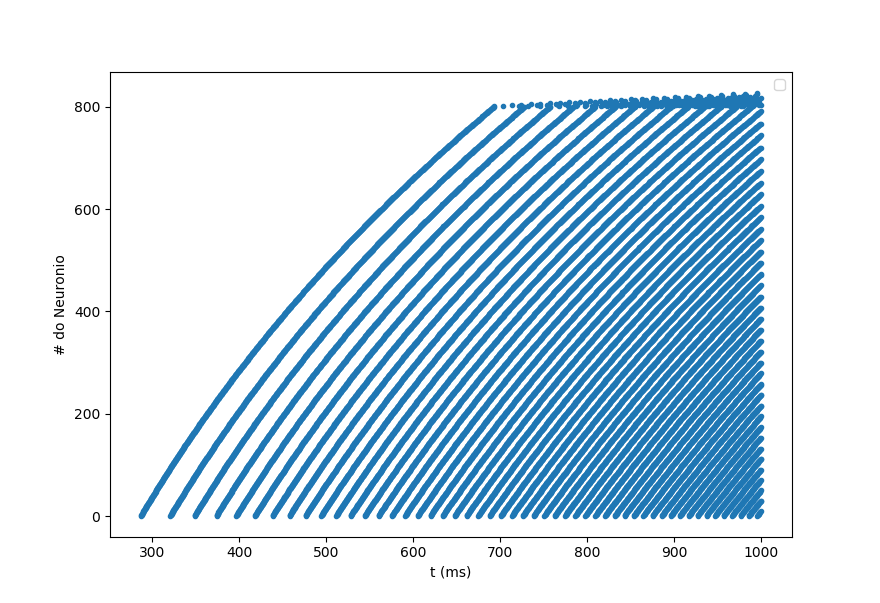

In [15]:
plt.figure()
plt.plot(spikeTimesMN_old2, spikingMN_old2, '.')
#plt.plot(spikeTimesRC_old, SpikingRC_old, '.', label = "Celulas de Renshaw")
plt.legend()
plt.xlabel('t (ms)')
plt.ylabel('# do Neuronio')
#plt.title('Parametros antigos (G Maltenfort)')
plt.show()

<IPython.core.display.Javascript object>


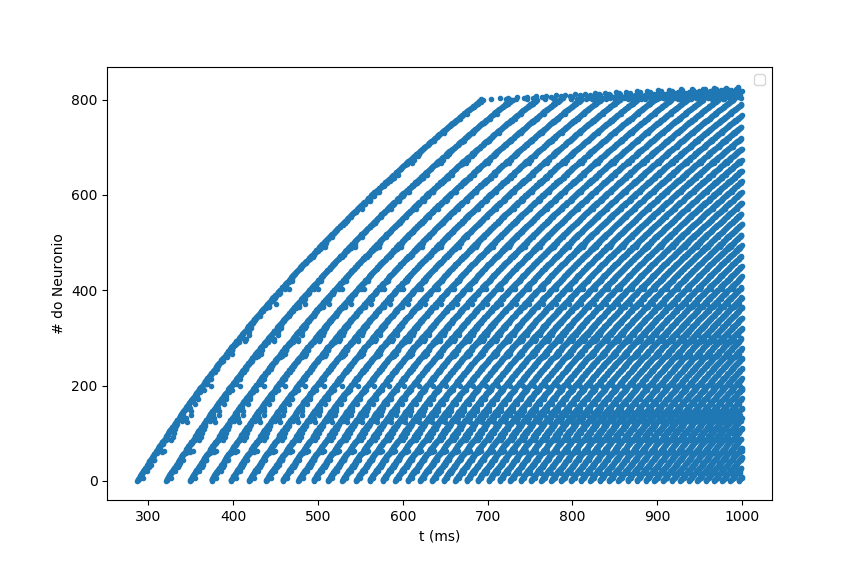

In [14]:
plt.figure()
plt.plot(spikeTimesMN_new, spikingMN_new, '.', label = "Motoneuronios")
#plt.plot(spikeTimesRC_new, SpikingRC_new, '.', label = "Celulas de Renshaw")
plt.legend()
plt.xlabel('t (ms)')
plt.ylabel('# do Neuronio')
plt.title('Parametros novos')
plt.show()

<IPython.core.display.Javascript object>


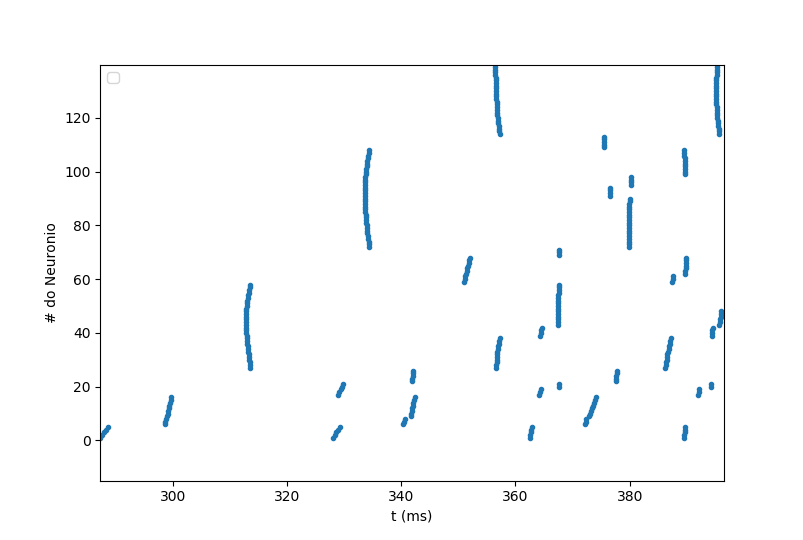

In [13]:
plt.figure()
plt.plot(spikeTimesMN_old, spikingMN_old, '.')
#plt.plot(spikeTimesRC_old, SpikingRC_old, '.', label = "Celulas de Renshaw")
plt.legend()
plt.xlabel('t (ms)')
plt.ylabel('# do Neuronio')
#plt.title('Parametros antigos')
plt.show()

These simulations, together with the ones from Uchiyama et al. 2003, should bring interesting discussions. Last simulation took 2hrs

<IPython.core.display.Javascript object>


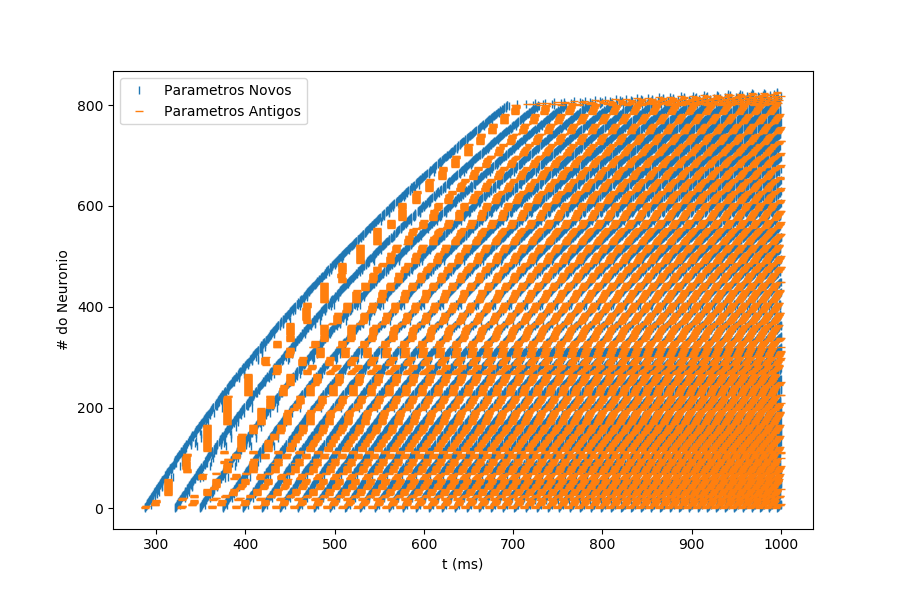

In [11]:
plt.figure()
plt.plot(spikeTimesMN_new, spikingMN_new, '|', label = "Parametros Novos")
plt.plot(spikeTimesMN_old, spikingMN_old, '_', label = "Parametros Antigos")
plt.legend()
plt.xlabel('t (ms)')
plt.ylabel('# do Neuronio')
#plt.title('Comparacao dos Parametros')
plt.show()